# CONTENT LIST

1. Importing libraries and data and renaming columns
2. The elbow technique
3. k-means clustering

# 01. Importing libraries and data and renaming columns


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\chery\Desktop\CareerFoundry\Immersion Data Analytics\Achievement 6'

In [5]:
# Import Merged Clean DF

df = pd.read_pickle(os.path.join(path, '04-2021 PPP Loan Analysis','02 Data', 'Prepared Data','Task 6.3 Merged.pkl'))

In [12]:
#Reduce DF to only quantitative columns necessary for clustering

df_cluster = df[['loan_amount','jobs_reported']]

In [14]:
df_cluster.head()

,loan_amount,jobs_reported
0,149992.0,11.0
1,149980.0,12.0
2,149975.0,6.0
3,149950.0,10.0
4,149922.0,12.0


In [15]:
df_cluster.shape

(4200172, 2)

# 02. The elbow technique

In [16]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [18]:
score = [kmeans[i].fit(df_cluster).score(df_cluster) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-4555895163206303.0,
 -1170056832134994.2,
 -536766541312297.0,
 -321315502363642.4,
 -199975307529047.4,
 -135238279495790.53,
 -99864110698094.78,
 -78892145292009.55,
 -62156449485267.01]

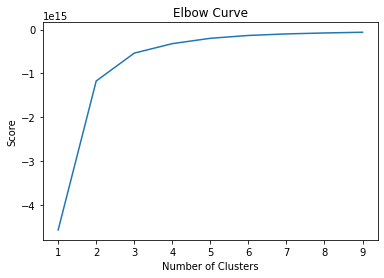

In [19]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### A large jump is seen from two to three on the x-axis, but after this jump the curve straightens out. This implies that the optimal count for the clusters is three.

# 03. k-means Clustering

In [20]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [21]:
# Fit the k-means object to the data.

kmeans.fit(df_cluster)

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [22]:
df_cluster['clusters'] = kmeans.fit_predict(df_cluster)

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
<ipython-input-22-a3840f0a4d0e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cluster['clusters'] = kmeans.fit_predict(df_cluster)


In [23]:
df_cluster.head()

,loan_amount,jobs_reported,clusters
0,149992.0,11.0,1
1,149980.0,12.0,1
2,149975.0,6.0,1
3,149950.0,10.0,1
4,149922.0,12.0,1


In [24]:
df_cluster['clusters'].value_counts()

0    2833562
2     917403
1     449207
Name: clusters, dtype: int64

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\IPython\core\pylabtools.py:134: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


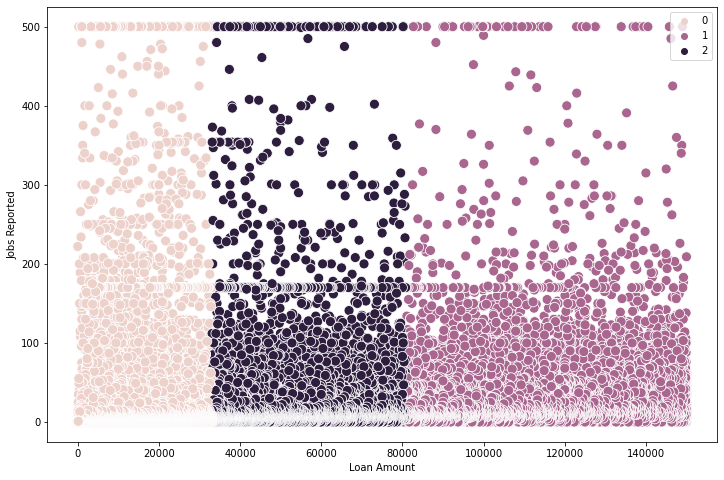

In [25]:
# Plot the clusters for the "loan_amount" and "jobs_reported" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_cluster['loan_amount'], y=df_cluster['jobs_reported'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Loan Amount') # Label x-axis.
plt.ylabel('Jobs Reported') # Label y-axis.
plt.show()

#### The clusters created seem to be divided by loan amount following the pattern below. I don't believe that clustering sheds useful insight into the relationship b/w loan amount & jobs reported, other than we learned that more than half of the loans are under $375,000.

'0' = data points b/w zero - 375,000 thousand dollars

'1' = data points b/w 375,000 - 800,000 thousand dollars

'2' = points at 800,000 thousand dollars or higher

In [26]:
df_cluster.loc[df_cluster['clusters'] == 2, 'cluster'] = 'dark purple'
df_cluster.loc[df_cluster['clusters'] == 1, 'cluster'] = 'purple'
df_cluster.loc[df_cluster['clusters'] == 0, 'cluster'] = 'pink'

C:\Users\chery\anaconda3\envs\CF\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\chery\anaconda3\envs\CF\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\chery\anaconda3\envs\CF\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [27]:
#Calculate decriptive statistics of clusters

df_cluster.groupby('cluster').agg({'loan_amount':['mean', 'median'], 
                                   'jobs_reported':['mean', 'median']})

loan_amount            jobs_reported       
                      mean     median          mean median
cluster                                                   
dark purple   52426.321912   50036.19      7.208420    6.0
pink          13792.834921   12647.00      2.428967    1.0
purple       109498.175994  106575.00     13.008025   10.0

#### Findings: 

#### The above descriptive statistics support my hypothesis that higher loan amounts (represented by purple data points) resulted in a higher number of jobs reported. It is worth noting that more than half of the loans provided (2,833,562 represented by pink points) only resulted in a median of 1 job.